In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset to examine its structure and perform initial EDA
file_path = r'/content/Bank_Stability_Dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Bank_Name                     5000 non-null   object 
 1   Year                          5000 non-null   int64  
 2   Quarter                       5000 non-null   int64  
 3   Capital_Adequacy_Ratio        5000 non-null   float64
 4   Non_Performing_Loans_Ratio    5000 non-null   float64
 5   Liquidity_Coverage_Ratio      5000 non-null   float64
 6   Return_on_Assets              5000 non-null   float64
 7   Loan_to_Deposit_Ratio         5000 non-null   float64
 8   Net_Interest_Margin           5000 non-null   float64
 9   Operational_Efficiency_Ratio  5000 non-null   float64
 10  Went_Defunct                  4975 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 429.8+ KB


In [ ]:
data.head()

Bank_Name  Year  Quarter  Capital_Adequacy_Ratio  \
0     Central Mountain Bank  2000        1                    6.99   
1       First Mountain Bank  2000        1                   13.53   
2        United River Trust  2000        1                    8.55   
3    National State Bancorp  2000        1                   11.55   
4  National Coast Financial  2000        1                    4.80   

   Non_Performing_Loans_Ratio  Liquidity_Coverage_Ratio  Return_on_Assets  \
0                        6.59                     76.48              0.52   
1                        1.53                    125.43              1.77   
2                        1.44                    109.87              2.16   
3                        2.07                    105.75              1.73   
4                        6.12                     63.98              0.85   

   Loan_to_Deposit_Ratio  Net_Interest_Margin  Operational_Efficiency_Ratio  \
0                  96.49                 0.88                         95.79   
1                  65.34                 3.12                         30.87   
2                  60.92                 2.29                         64.66   
3                  71.11                 2.42                         53.76   
4                  99.80                 0.47                         88.23   

  Went_Defunct  
0          Yes  
1           No  
2           No  
3           No  
4          Yes

In [ ]:
data.describe(include='all')

Bank_Name         Year      Quarter  \
count                        5000  5000.000000  5000.000000   
unique                        244          NaN          NaN   
top     Community State Financial          NaN          NaN   
freq                           35          NaN          NaN   
mean                          NaN  2012.000000     2.500000   
std                           NaN     7.211824     1.118146   
min                           NaN  2000.000000     1.000000   
25%                           NaN  2006.000000     1.750000   
50%                           NaN  2012.000000     2.500000   
75%                           NaN  2018.000000     3.250000   
max                           NaN  2024.000000     4.000000   

        Capital_Adequacy_Ratio  Non_Performing_Loans_Ratio  \
count              5000.000000                 5000.000000   
unique                     NaN                         NaN   
top                        NaN                         NaN   
freq                       NaN                         NaN   
mean                 10.784664                    3.042464   
std                   3.114664                    2.594853   
min                   0.000000                    0.000000   
25%                   9.190000                    1.490000   
50%                  11.380000                    2.290000   
75%                  12.920000                    3.400000   
max                  19.880000                   15.090000   

        Liquidity_Coverage_Ratio  Return_on_Assets  Loan_to_Deposit_Ratio  \
count                5000.000000       5000.000000            5000.000000   
unique                       NaN               NaN                    NaN   
top                          NaN               NaN                    NaN   
freq                         NaN               NaN                    NaN   
mean                  109.926224          1.388390              75.721078   
std                    22.604021          1.366573              16.352177   
min                    39.170000         -4.660000              31.440000   
25%                   104.427500          1.230000              64.737500   
50%                   116.930000          1.830000              72.590000   
75%                   125.052500          2.240000              82.927500   
max                   156.790000          3.760000             142.980000   

        Net_Interest_Margin  Operational_Efficiency_Ratio Went_Defunct  
count           5000.000000                   5000.000000         4975  
unique                  NaN                           NaN            2  
top                     NaN                           NaN           No  
freq                    NaN                           NaN         3975  
mean               2.599438                     56.170966          NaN  
std                0.938212                     15.692040          NaN  
min                0.000000                     15.050000          NaN  
25%                2.237500                     45.220000          NaN  
50%                2.840000                     53.220000          NaN  
75%                3.240000                     64.782500          NaN  
max                4.690000                    118.530000          NaN

In [ ]:
data['Went_Defunct'].fillna(data['Went_Defunct'].mode()[0], inplace=True)

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Encode categorical variables
# Convert 'Went_Defunct' to binary (Yes -> 1, No -> 0)
data['Went_Defunct'] = data['Went_Defunct'].map({'Yes': 1, 'No': 0})

In [ ]:
# Drop irrelevant columns
# Assuming 'Bank_Name' is not relevant for modeling
data.drop(columns=['Bank_Name'], inplace=True)

# Reset index after cleaning
data.reset_index(drop=True, inplace=True)

In [ ]:
data.isnull().sum()

Year                            0
Quarter                         0
Capital_Adequacy_Ratio          0
Non_Performing_Loans_Ratio      0
Liquidity_Coverage_Ratio        0
Return_on_Assets                0
Loan_to_Deposit_Ratio           0
Net_Interest_Margin             0
Operational_Efficiency_Ratio    0
Went_Defunct                    0
dtype: int64

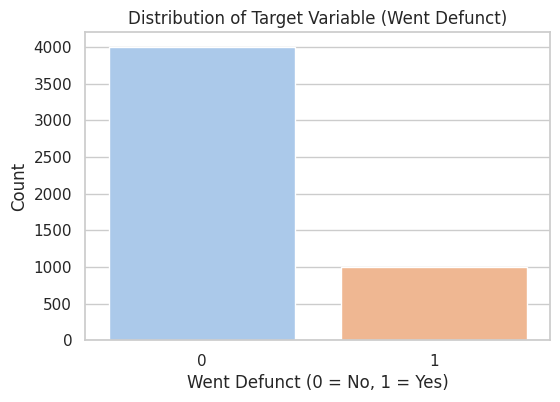

In [ ]:
# Set up visualization style
sns.set(style="whitegrid")

#Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Went_Defunct', data=data, palette='pastel')
plt.title('Distribution of Target Variable (Went Defunct)')
plt.xlabel('Went Defunct (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

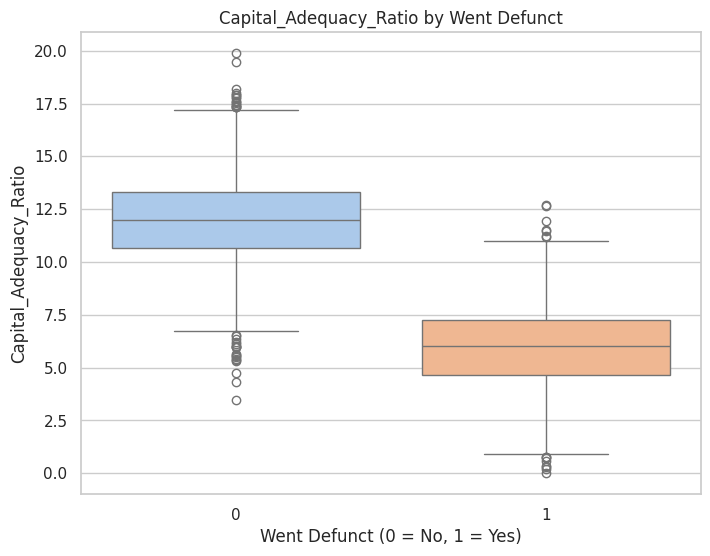

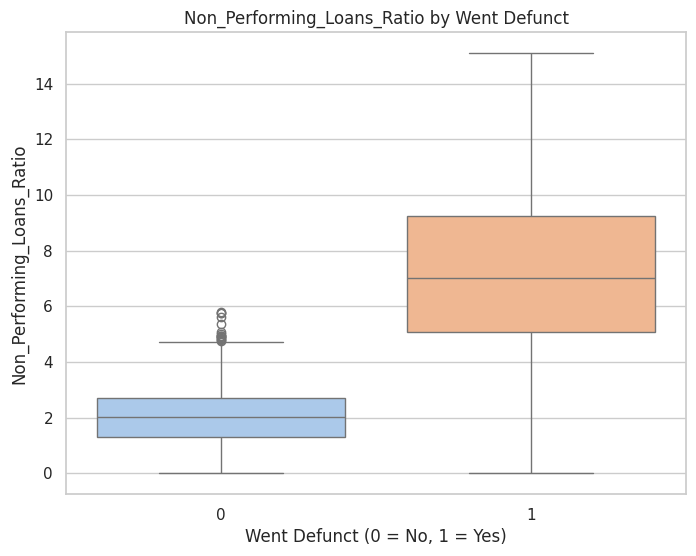

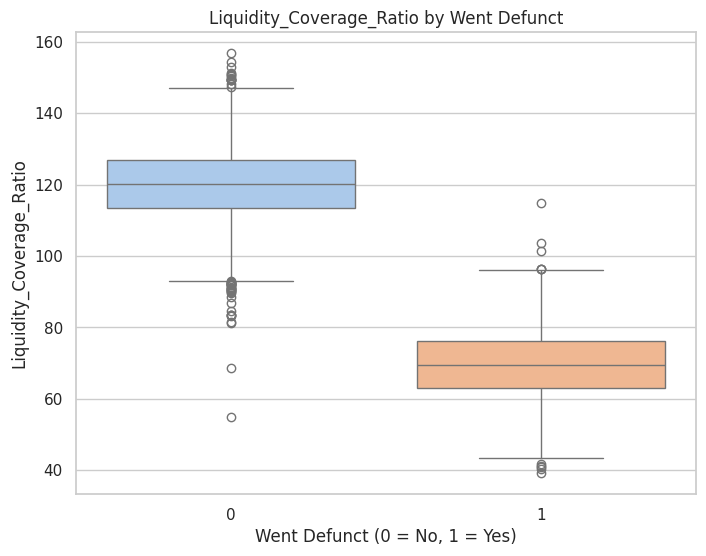

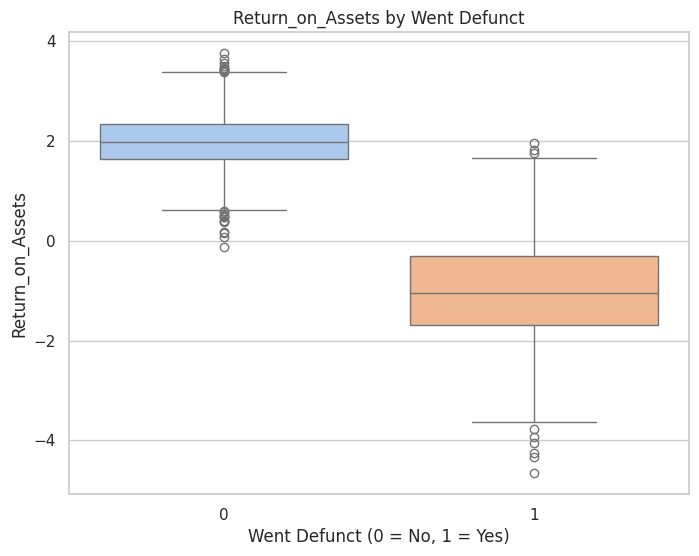

In [ ]:
#Boxplot for Key Variables by Target
key_features = ['Capital_Adequacy_Ratio', 'Non_Performing_Loans_Ratio',
                'Liquidity_Coverage_Ratio', 'Return_on_Assets']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Went_Defunct', y=feature, data=data, palette='pastel')
    plt.title(f'{feature} by Went Defunct')
    plt.xlabel('Went Defunct (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

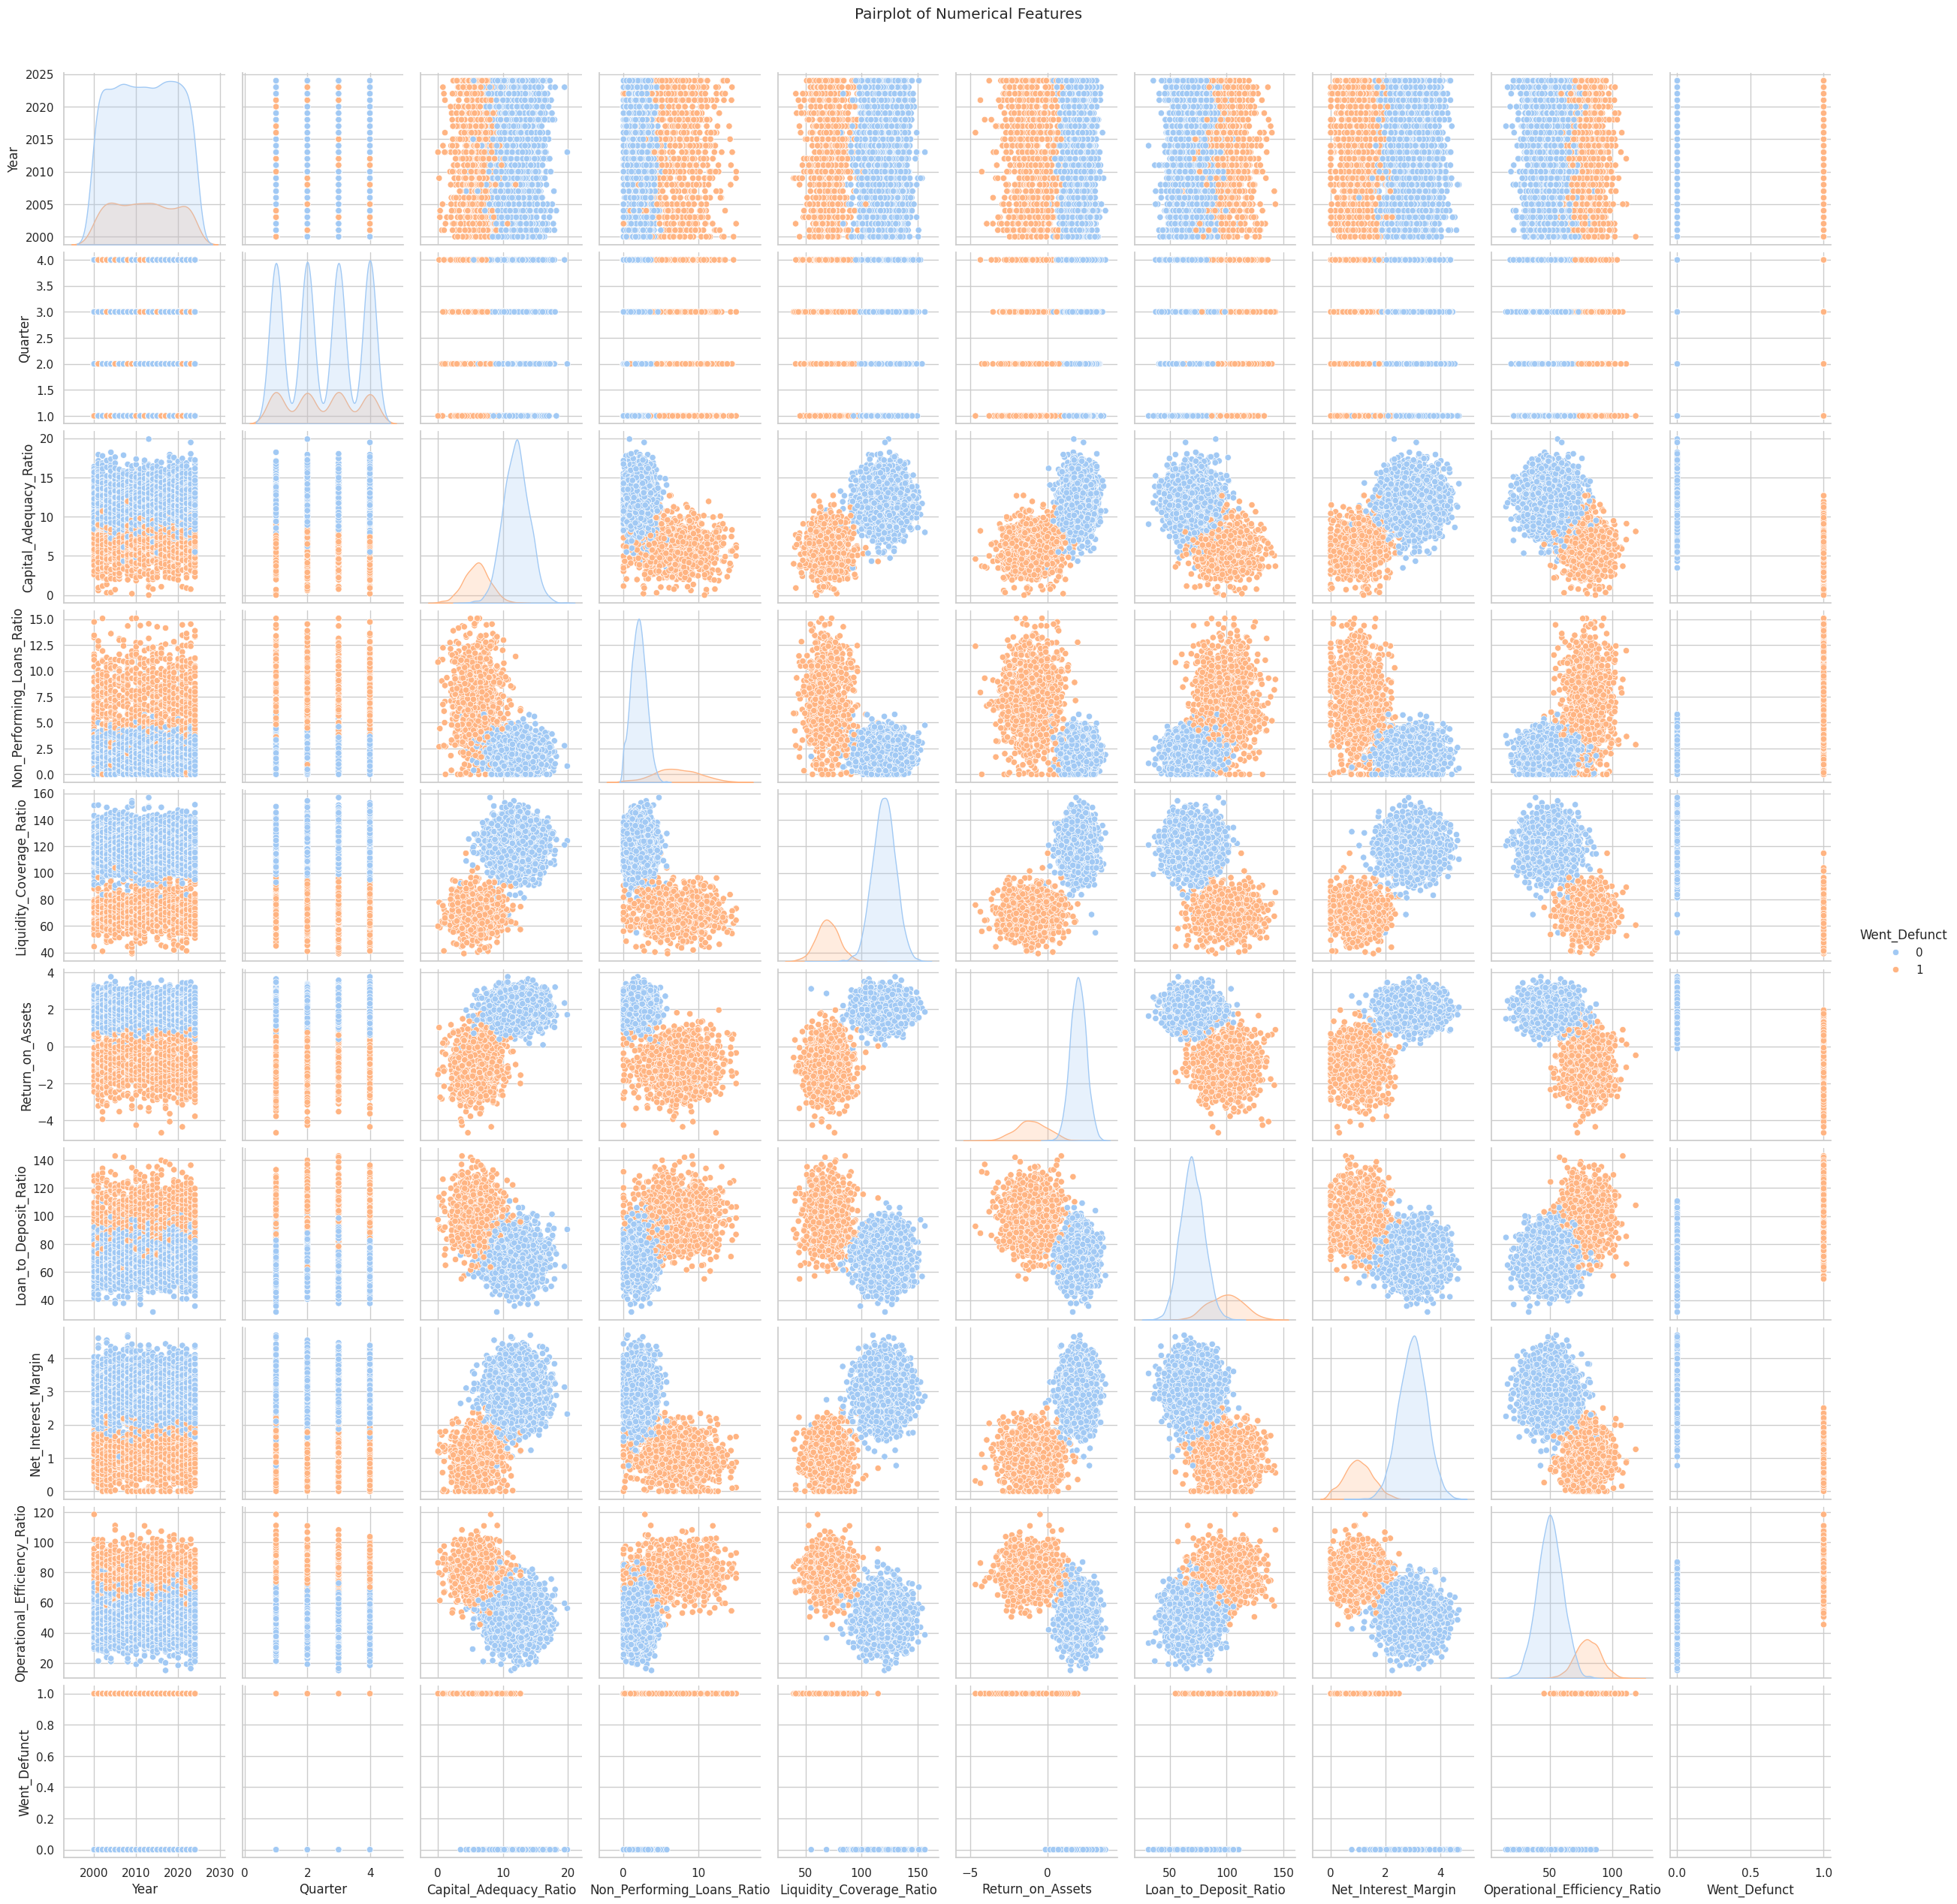

In [ ]:
#Pairplot for Numerical Features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(data, vars=numerical_cols, hue='Went_Defunct', palette='pastel', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

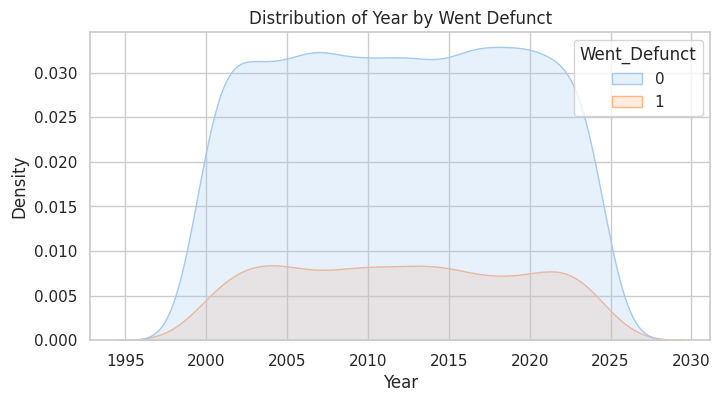

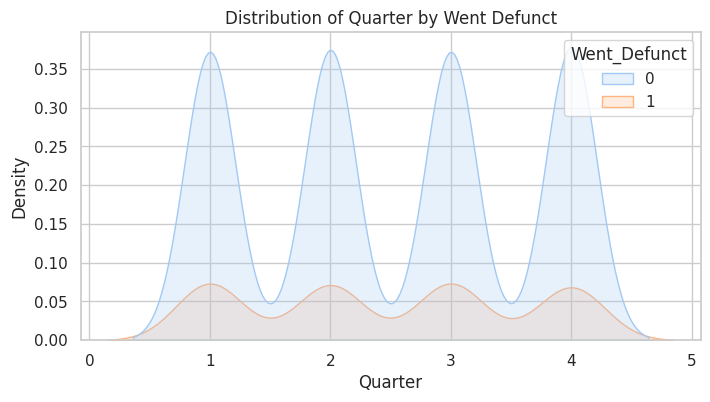

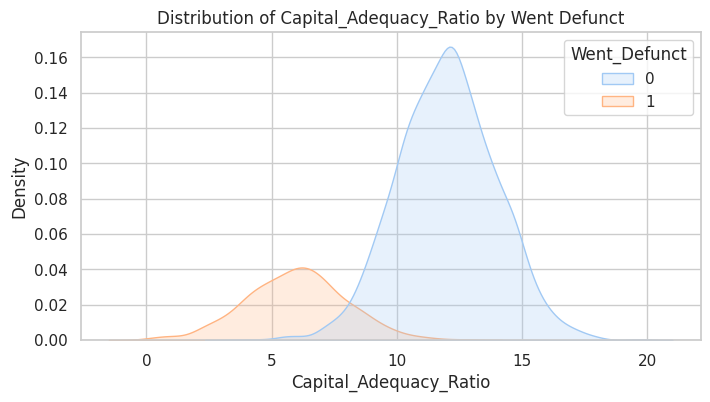

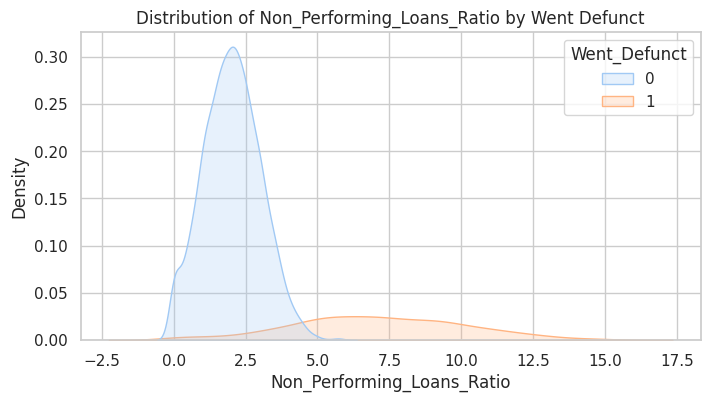

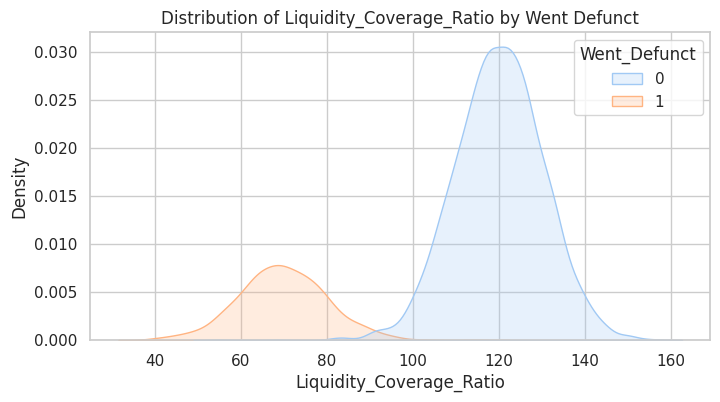

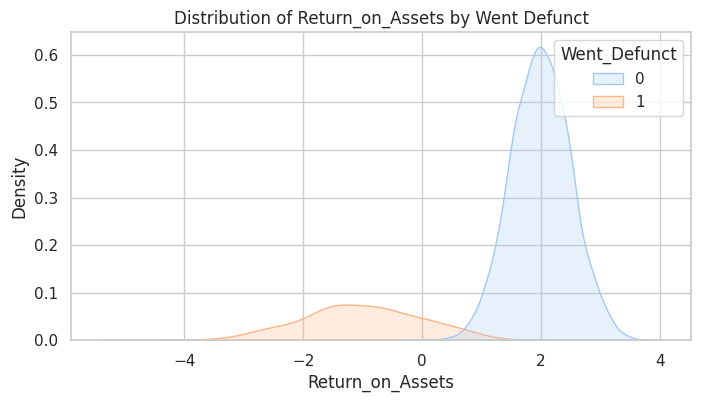

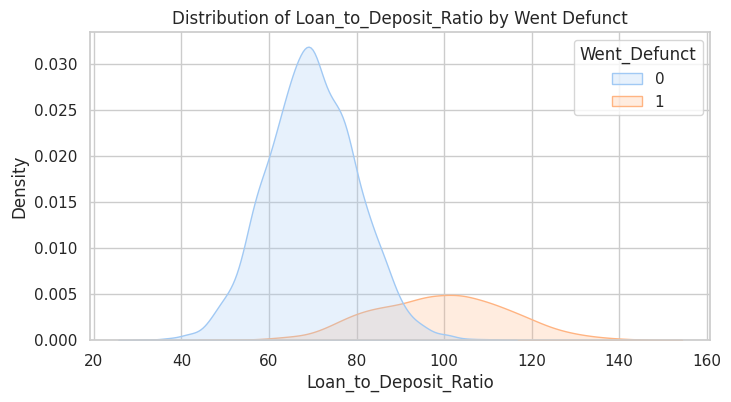

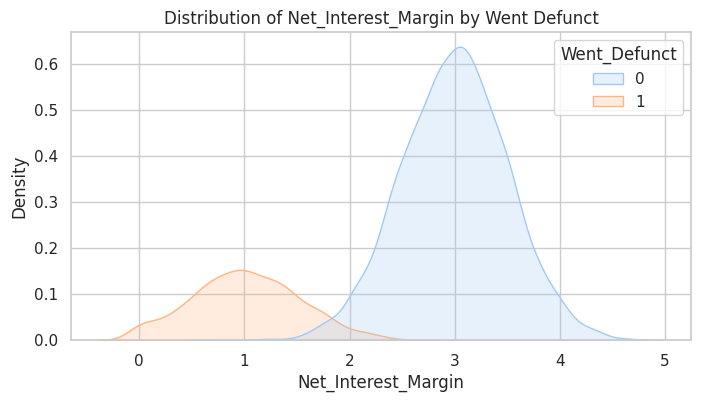

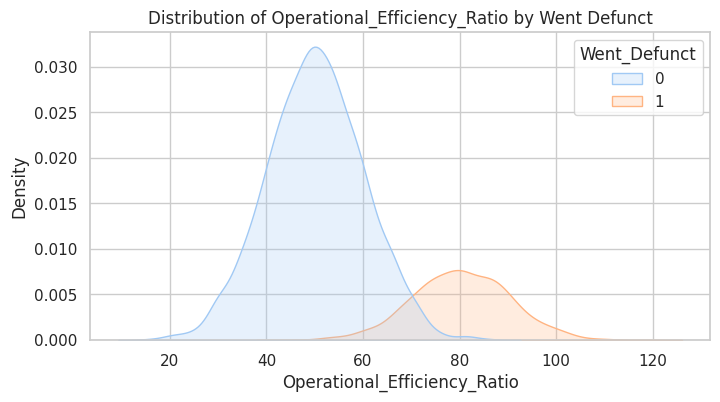

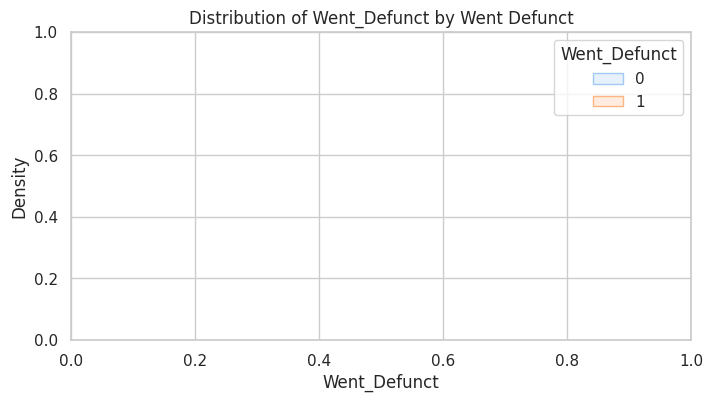

In [ ]:
# Distribution Plots for Numerical Features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=col, hue='Went_Defunct', palette='pastel', fill=True)
    plt.title(f'Distribution of {col} by Went Defunct')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

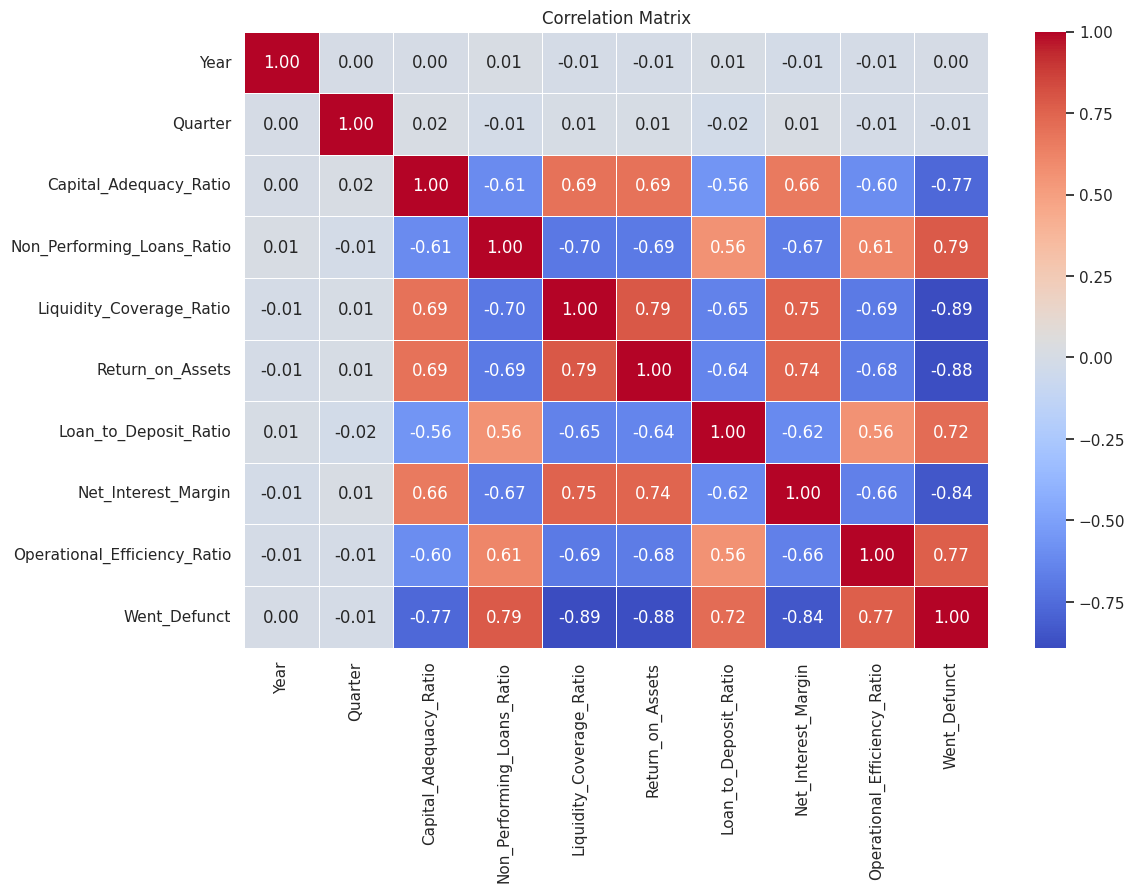

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



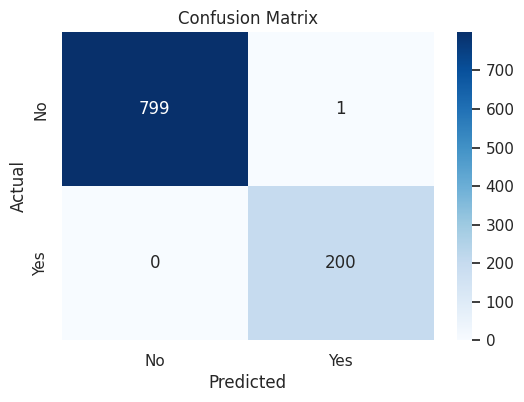

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = data.drop(columns=['Went_Defunct', 'Quarter', 'Year'])
y = data['Went_Defunct']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



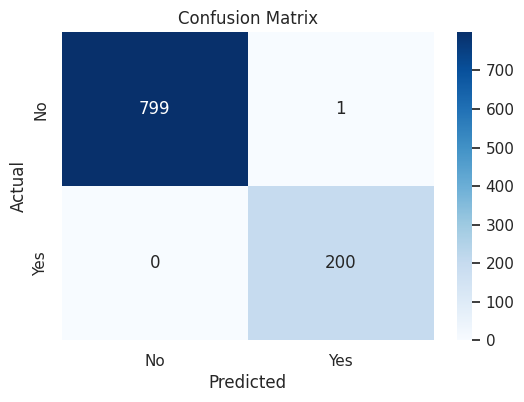

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector

# Preprocessing: Handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include='object'))
    ],
    remainder='passthrough'  # Keep numeric features as-is
)

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predicting the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pickle

# Save the pipeline to a pickle file
with open('pipeline_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Pipeline model saved as 'pipeline_model.pkl'")


Pipeline model saved as 'pipeline_model.pkl'


In [ ]:
from joblib import dump

# Save the pipeline to a joblib file
dump(pipeline, 'pipeline_model.joblib')

print("Pipeline model saved as 'pipeline_model.joblib'")


Pipeline model saved as 'pipeline_model.joblib'


In [ ]:
# Load the pipeline from a pickle file
with open('pipeline_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Use the loaded pipeline for prediction
y_pred = loaded_pipeline.predict(X_test)


In [ ]:
from joblib import load

# Load the pipeline from a joblib file
loaded_pipeline = load('pipeline_model.joblib')

# Use the loaded pipeline for prediction
y_pred = loaded_pipeline.predict(X_test)


In [ ]:
import chardet

with open('/content/pipeline_model.pkl', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  # This will show the detected encoding


{'encoding': None, 'confidence': 0.0, 'language': None}


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RandomForestClassifier imported successfully")


RandomForestClassifier imported successfully


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Test if scikit-learn and NumPy work together
X = np.array([[1, 2], [3, 4], [5, 6]])
distances = pairwise_distances(X)
print(distances)


[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]
